# India House Price data

In [1]:
# ! pip install matplotlib==3.7.3

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settingsb
%matplotlib inline

In [59]:
import matplotlib
matplotlib.__version__

'3.7.3'

In [60]:
# ! poetry show | grep matplotlib

In [61]:
# ! pip freeze | grep matplotlib

## Configuration

In [62]:
csv_file = settings.DATA_FOLDER /'house_prices_clean.csv'

In [63]:
df = pd.read_csv(csv_file)

df.shape

(29451, 14)

In [64]:
df.sample(5)

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
10674,0,0,3,"2,435.06",1,1,12.84,77.66,150.00,0,0,1,1,0
22856,1,1,3,"2,345.18",0,0,28.40,77.07,270.00,0,1,0,1,0
8474,0,0,3,"1,775.04",1,1,28.59,77.40,95.00,0,0,1,1,0
18982,0,0,3,"1,710.08",1,1,22.34,73.20,65.00,0,0,1,1,0
10344,0,0,2,"1,209.88",1,1,22.57,88.36,95.00,0,1,0,1,0


## EDA

In [65]:
df.isna().sum()

under_construction     0
rera                   0
bhk_no                 0
square_ft              0
ready_to_move          0
resale                 0
longitude              0
latitude               0
targetprice_in_lacs    0
posted_by_Builder      0
posted_by_Dealer       0
posted_by_Owner        0
bhk_or_rk_BHK          0
bhk_or_rk_RK           0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   under_construction   29451 non-null  int64  
 1   rera                 29451 non-null  int64  
 2   bhk_no               29451 non-null  int64  
 3   square_ft            29451 non-null  float64
 4   ready_to_move        29451 non-null  int64  
 5   resale               29451 non-null  int64  
 6   longitude            29451 non-null  float64
 7   latitude             29451 non-null  float64
 8   targetprice_in_lacs  29451 non-null  float64
 9   posted_by_Builder    29451 non-null  int64  
 10  posted_by_Dealer     29451 non-null  int64  
 11  posted_by_Owner      29451 non-null  int64  
 12  bhk_or_rk_BHK        29451 non-null  int64  
 13  bhk_or_rk_RK         29451 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 3.1 MB


In [67]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
count,"29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00"
mean,0.18,0.32,2.39,"19,802.17",0.82,0.93,21.30,76.84,142.90,0.02,0.62,0.36,1.00,0.00
std,0.38,0.47,0.88,"1,901,334.91",0.38,0.26,6.21,10.56,656.88,0.14,0.49,0.48,0.03,0.03
min,0.00,0.00,1.00,3.00,0.00,0.00,-37.71,-121.76,0.25,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,2.00,900.02,1.00,1.00,18.45,73.80,38.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,0.00,2.00,"1,175.06",1.00,1.00,20.75,77.32,62.00,0.00,1.00,0.00,1.00,0.00
75%,0.00,1.00,3.00,"1,550.69",1.00,1.00,26.90,77.83,100.00,0.00,1.00,1.00,1.00,0.00
max,1.00,1.00,20.00,"254,545,454.50",1.00,1.00,59.91,152.96,"30,000.00",1.00,1.00,1.00,1.00,1.00


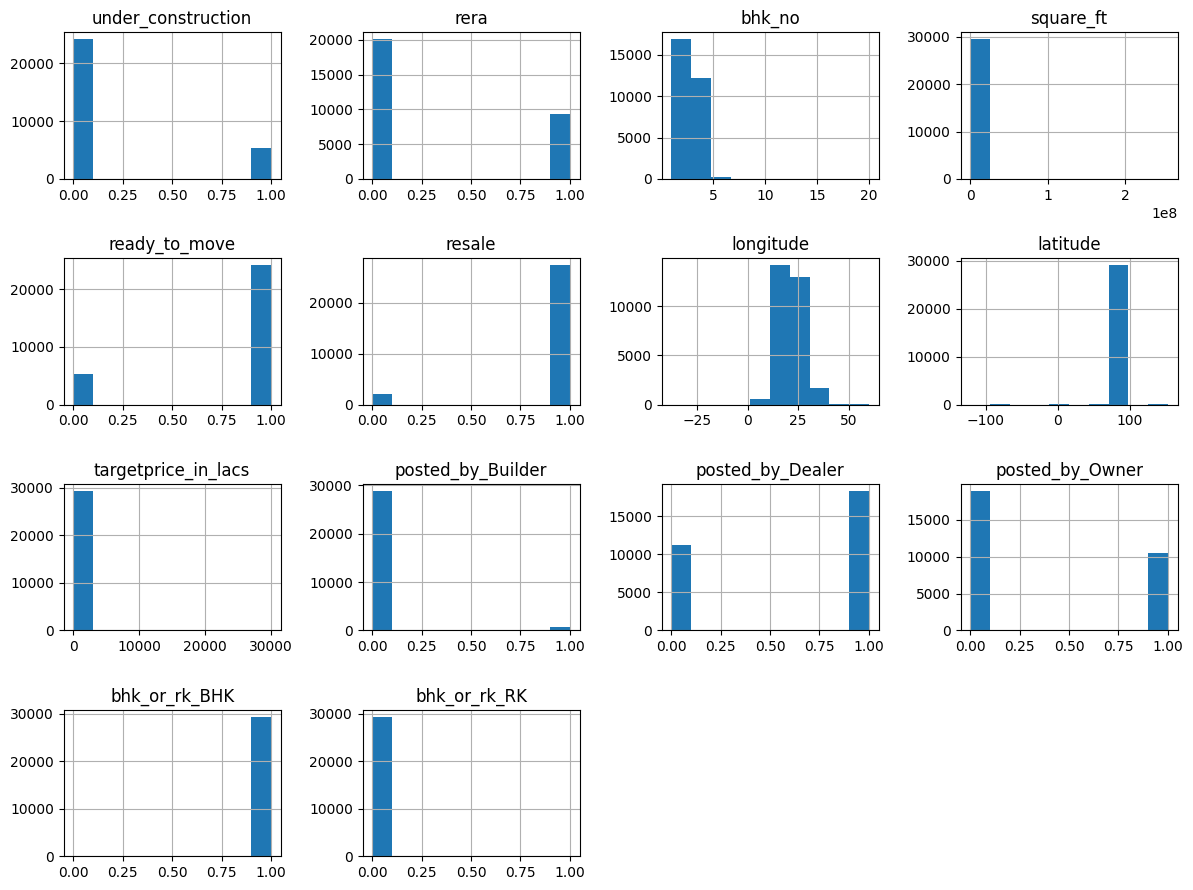

In [68]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

<Axes: >

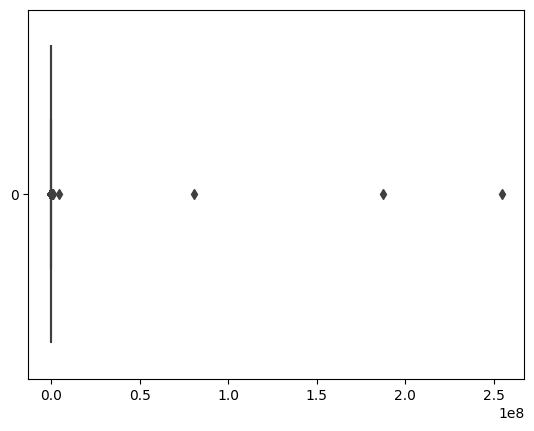

In [74]:
sns.boxplot(data=df['square_ft'], orient='h')

### Correlation

In [70]:
df.corr()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
under_construction,1.00,0.36,-0.04,-0.00,-1.00,-0.35,0.01,-0.00,0.06,0.19,0.17,-0.23,-0.02,0.02
rera,0.36,1.00,0.01,-0.01,-0.36,-0.27,0.10,-0.07,0.07,0.11,0.24,-0.27,-0.01,0.01
bhk_no,-0.04,0.01,1.00,0.01,0.04,0.01,0.07,0.05,0.11,-0.02,0.09,-0.09,0.05,-0.05
square_ft,-0.00,-0.01,0.01,1.00,0.00,0.00,-0.01,0.00,0.40,-0.00,-0.01,0.01,0.00,-0.00
ready_to_move,-1.00,-0.36,0.04,0.00,1.00,0.35,-0.01,0.00,-0.06,-0.19,-0.17,0.23,0.02,-0.02
resale,-0.35,-0.27,0.01,0.00,0.35,1.00,0.02,0.01,-0.21,-0.53,-0.04,0.20,0.03,-0.03
longitude,0.01,0.10,0.07,-0.01,-0.01,0.02,1.00,-0.16,-0.03,-0.03,0.07,-0.06,-0.01,0.01
latitude,-0.00,-0.07,0.05,0.00,0.00,0.01,-0.16,1.00,-0.02,-0.00,-0.03,0.03,-0.00,0.00
targetprice_in_lacs,0.06,0.07,0.11,0.40,-0.06,-0.21,-0.03,-0.02,1.00,0.02,0.09,-0.09,0.00,-0.00
posted_by_Builder,0.19,0.11,-0.02,-0.00,-0.19,-0.53,-0.03,-0.00,0.02,1.00,-0.19,-0.11,-0.04,0.04


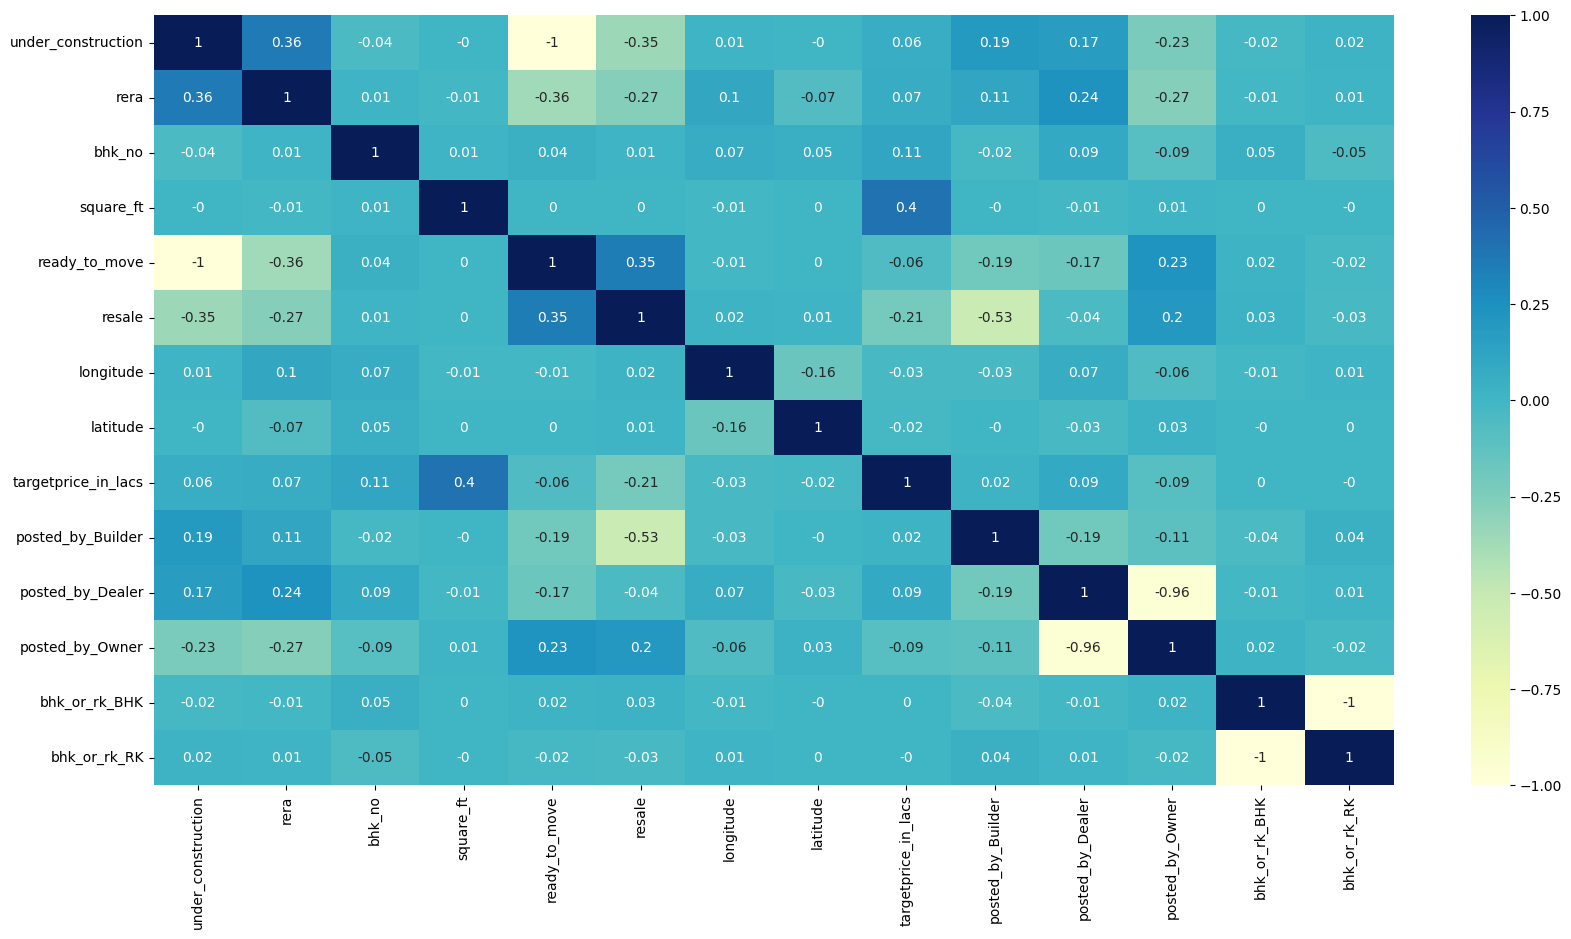

In [71]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', annot_kws={"size": 10})
#sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [72]:
import matplotlib
print(f'Pandas    : {pd.__version__}')
print(f'Seaborn   : {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

Pandas    : 2.1.0
Seaborn   : 0.12.2
Matplotlib: 3.7.3


In [73]:
! cat /etc/os-release

NAME="Pop!_OS"
VERSION="22.04 LTS"
ID=pop
ID_LIKE="ubuntu debian"
PRETTY_NAME="Pop!_OS 22.04 LTS"
VERSION_ID="22.04"
HOME_URL="https://pop.system76.com"
SUPPORT_URL="https://support.system76.com"
BUG_REPORT_URL="https://github.com/pop-os/pop/issues"
PRIVACY_POLICY_URL="https://system76.com/privacy"
VERSION_CODENAME=jammy
UBUNTU_CODENAME=jammy
LOGO=distributor-logo-pop-os


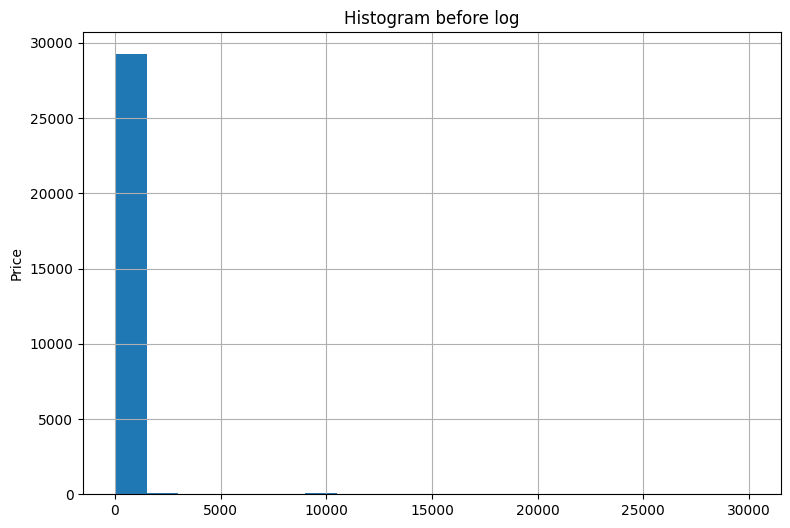

In [77]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title(f'Histogram before log')
ax.set_ylabel('Count')
ax.set_xlabel('Price')
df['targetprice_in_lacs'].hist(bins=20)
plt.show()